## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2
   #build_mlp(input_shape=x_train.shape[1:], l_ratio=regulizer_ratio)
    
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [12]:
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 159us/step - loss: 6.0081 - acc: 0.2707 - val_loss: 5.8102 - val_acc: 0.3423
Epoch 2/50
50000/50000 [==============================] - 7s 136us/step - loss: 5.7178 - acc: 0.3658 - val_loss: 5.6343 - val_acc: 0.3828
Epoch 3/50
50000/50000 [==============================] - 7s 134us/step - loss: 5.5677 - acc: 0.3988 - val_loss: 5.5031 - val_acc: 0.4091
Epoch 4/50
50000/50000 [==============================] - 7s 130us/step - loss: 5.4452 - acc: 0.4197 - val_loss: 5.3918 - val_acc: 0.4235
Epoch 5/50
50000/50000 [==============================] - 7s 130us/step - loss: 5.3374 - acc: 0.4327 - val_loss: 5.2977 - val_acc: 0.4407
Epoch 6/50
50000/50000 [==============================] - 7s 132us/step - loss: 5.2374 - acc: 0.4462 - val_loss: 5.2029 - val_acc: 0.4464
Epoch 7/50
50000/50000 [==============================] - 7s 135us/step - loss: 5.1434 - acc: 0.4573 - val_loss: 5.1077 - 

Epoch 2/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.8023 - acc: 0.3675 - val_loss: 1.7523 - val_acc: 0.3904
Epoch 3/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.7140 - acc: 0.3992 - val_loss: 1.6853 - val_acc: 0.4066
Epoch 4/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.6548 - acc: 0.4193 - val_loss: 1.6393 - val_acc: 0.4280
Epoch 5/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.6084 - acc: 0.4362 - val_loss: 1.6001 - val_acc: 0.4348
Epoch 6/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.5708 - acc: 0.4472 - val_loss: 1.5712 - val_acc: 0.4453
Epoch 7/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.5394 - acc: 0.4594 - val_loss: 1.5381 - val_acc: 0.4614
Epoch 8/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5096 - acc: 0.4697 - val_loss: 1.5177 - val_acc: 0.4623
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 6s 126us/step - loss: 1.7279 - acc: 0.3953 - val_loss: 1.6949 - val_acc: 0.4073
Epoch 4/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.6664 - acc: 0.4168 - val_loss: 1.6521 - val_acc: 0.4184
Epoch 5/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.6192 - acc: 0.4339 - val_loss: 1.6063 - val_acc: 0.4357
Epoch 6/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.5779 - acc: 0.4468 - val_loss: 1.5828 - val_acc: 0.4400
Epoch 7/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.5449 - acc: 0.4586 - val_loss: 1.5506 - val_acc: 0.4503
Epoch 8/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.5144 - acc: 0.4697 - val_loss: 1.5359 - val_acc: 0.4578
Epoch 9/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.4892 - acc: 0.4766 - val_loss: 1.5150 - val_acc: 0.4592
Epoch 10/50
50000/50000 [====================

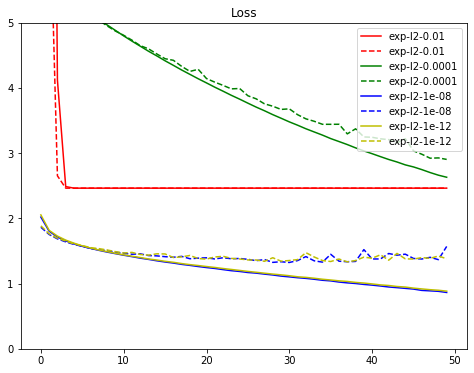

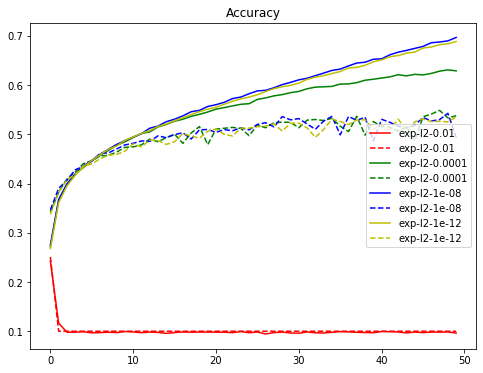

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()


In [14]:
#
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L_l1_l2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [16]:
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L_l1_l2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 152us/step - loss: 18.7729 - acc: 0.2789 - val_loss: 17.3317 - val_acc: 0.3403
Epoch 2/50
50000/50000 [==============================] - 7s 142us/step - loss: 16.1177 - acc: 0.3589 - val_loss: 14.9568 - val_acc: 0.3768
Epoch 3/50
50000/50000 [==============================] - 7s 143us/step - loss: 13.9369 - acc: 0.3827 - val_loss: 12.9589 - val_acc: 0.3908
Epoch 4/50
50000/50000 [==============================] - 7s 138us/step - loss: 12.0930 - acc: 0.3938 - val_loss: 11.2589 - val_acc: 0.4035
Epoch 5/50
50000/50000 [==============================] - 7s 140us/step - loss: 10.5247 - acc: 0.4044 - val_loss: 9.8150 - val_acc: 0.4101
Epoch 6/50
50000/50000 [==============================] - 7s 142us/step - loss: 9.1890 - acc: 0.4116 - val_loss: 8.5854 - val_acc: 0.4139
Epoch 7/50
50000/50000 [==============================] - 7s 142us/step - loss: 8.0520 - acc: 0.4166 - val_loss: 

Epoch 2/50
50000/50000 [==============================] - 7s 139us/step - loss: 13.0049 - acc: 0.3613 - val_loss: 12.1128 - val_acc: 0.3779
Epoch 3/50
50000/50000 [==============================] - 7s 142us/step - loss: 11.3340 - acc: 0.3847 - val_loss: 10.5930 - val_acc: 0.3928
Epoch 4/50
50000/50000 [==============================] - 7s 142us/step - loss: 9.9235 - acc: 0.4008 - val_loss: 9.2887 - val_acc: 0.3997
Epoch 5/50
50000/50000 [==============================] - 7s 142us/step - loss: 8.7249 - acc: 0.4107 - val_loss: 8.1836 - val_acc: 0.4114
Epoch 6/50
50000/50000 [==============================] - 7s 142us/step - loss: 7.7010 - acc: 0.4189 - val_loss: 7.2406 - val_acc: 0.4215
Epoch 7/50
50000/50000 [==============================] - 7s 140us/step - loss: 6.8298 - acc: 0.4257 - val_loss: 6.4349 - val_acc: 0.4319
Epoch 8/50
50000/50000 [==============================] - 7s 139us/step - loss: 6.0862 - acc: 0.4325 - val_loss: 5.7551 - val_acc: 0.4307
Epoch 9/50
50000/50000 [======

50000/50000 [==============================] - 7s 140us/step - loss: 11.3469 - acc: 0.3788 - val_loss: 10.5963 - val_acc: 0.3890
Epoch 4/50
50000/50000 [==============================] - 7s 141us/step - loss: 9.9335 - acc: 0.3962 - val_loss: 9.2960 - val_acc: 0.4033
Epoch 5/50
50000/50000 [==============================] - 7s 141us/step - loss: 8.7323 - acc: 0.4067 - val_loss: 8.1922 - val_acc: 0.4083
Epoch 6/50
50000/50000 [==============================] - 7s 143us/step - loss: 7.7105 - acc: 0.4150 - val_loss: 7.2509 - val_acc: 0.4150
Epoch 7/50
50000/50000 [==============================] - 7s 143us/step - loss: 6.8393 - acc: 0.4205 - val_loss: 6.4657 - val_acc: 0.4124
Epoch 8/50
50000/50000 [==============================] - 7s 141us/step - loss: 6.0955 - acc: 0.4258 - val_loss: 5.7607 - val_acc: 0.4267
Epoch 9/50
50000/50000 [==============================] - 7s 141us/step - loss: 5.4600 - acc: 0.4325 - val_loss: 5.1739 - val_acc: 0.4301
Epoch 10/50
50000/50000 [==================

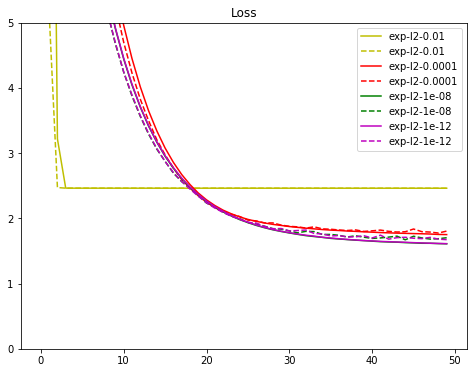

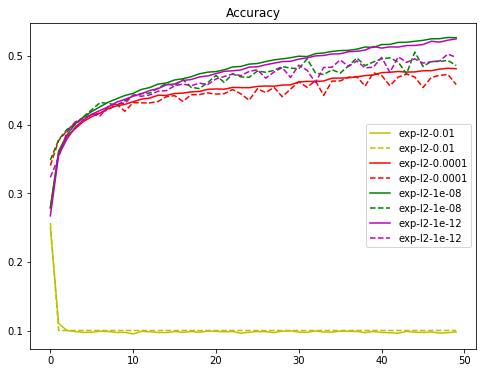

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["y","r", "g",  "m", "k", "b"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
